## Superstore Sales Analysis

Objective:
Analyze sales performance across regions, categories, and time to identify
key trends, best/worst products, and actionable business insights.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")


In [9]:
df = pd.read_csv("Data/Sample - Superstore.csv", encoding="latin1")
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [10]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [11]:
df.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [12]:
df.isnull().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


In [14]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month Name'] = df['Order Date'].dt.month_name()
df['Quarter'] = df['Order Date'].dt.to_period('Q')


In [15]:
df['Profit Margin (%)'] = (df['Profit'] / df['Sales']) * 100


In [16]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
profit_margin = (total_profit / total_sales) * 100
total_orders = df['Order ID'].nunique()
avg_order_value = total_sales / total_orders

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Profit Margin: {profit_margin:.2f}%")
print(f"Total Orders: {total_orders}")
print(f"Average Order Value: ${avg_order_value:,.2f}")


Total Sales: $2,297,200.86
Total Profit: $286,397.02
Profit Margin: 12.47%
Total Orders: 5009
Average Order Value: $458.61


### KPI Summary
- The dataset contains nearly 10,000 orders across multiple regions and categories.
- Overall profit margin is moderate, indicating scope for pricing and discount optimization.
- Average order value reflects strong contribution from Technology products.


In [17]:
df[['Sales','Profit','Discount','Quantity']].describe()


,Sales,Profit,Discount,Quantity
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,28.656896,0.156203,3.789574
std,623.245101,234.260108,0.206452,2.225110
min,0.444000,-6599.978000,0.000000,1.000000
25%,17.280000,1.728750,0.000000,2.000000
50%,54.490000,8.666500,0.200000,3.000000
75%,209.940000,29.364000,0.200000,5.000000
max,22638.480000,8399.976000,0.800000,14.000000


### Statistical Summary Insights
- Average order sales value is around $230, indicating mid-sized transactions.
- Profit shows high variability with significant losses on some orders.
- Discounts go as high as 80%, which strongly impacts profitability.
- Majority of orders contain 2–5 items, indicating small-batch purchases.


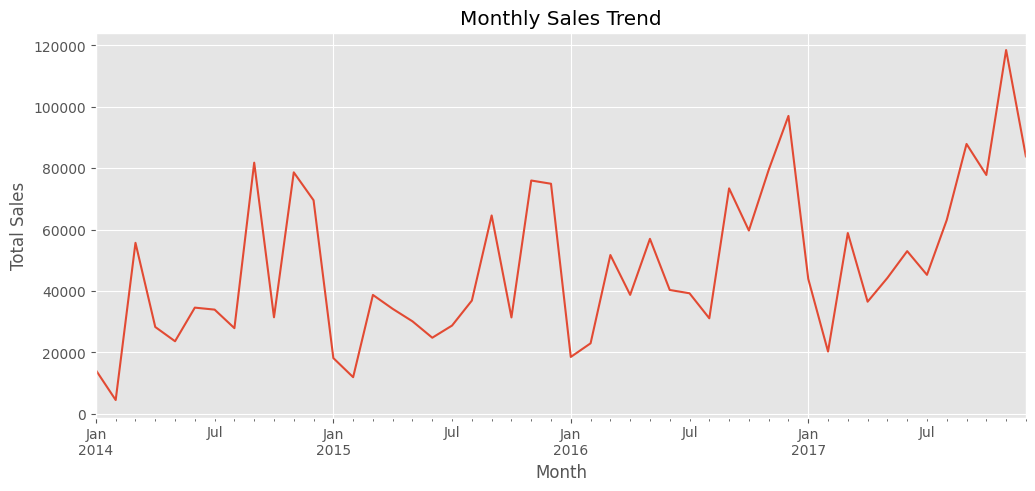

In [18]:
monthly_sales = (
    df.groupby(df['Order Date'].dt.to_period('M'))['Sales']
      .sum()
      .sort_index()
)

plt.figure(figsize=(12,5))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


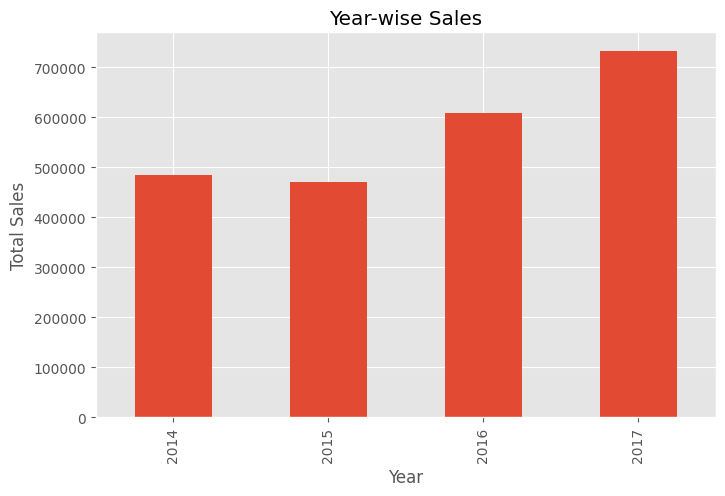

In [19]:
yearly_sales = df.groupby('Year')['Sales'].sum()

plt.figure(figsize=(8,5))
yearly_sales.plot(kind='bar')
plt.title("Year-wise Sales")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()


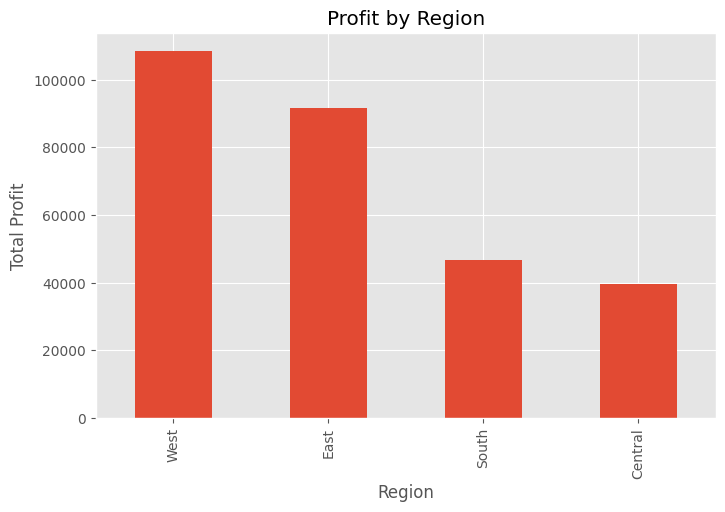

In [20]:
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
region_profit.plot(kind='bar')
plt.title("Profit by Region")
plt.xlabel("Region")
plt.ylabel("Total Profit")
plt.show()


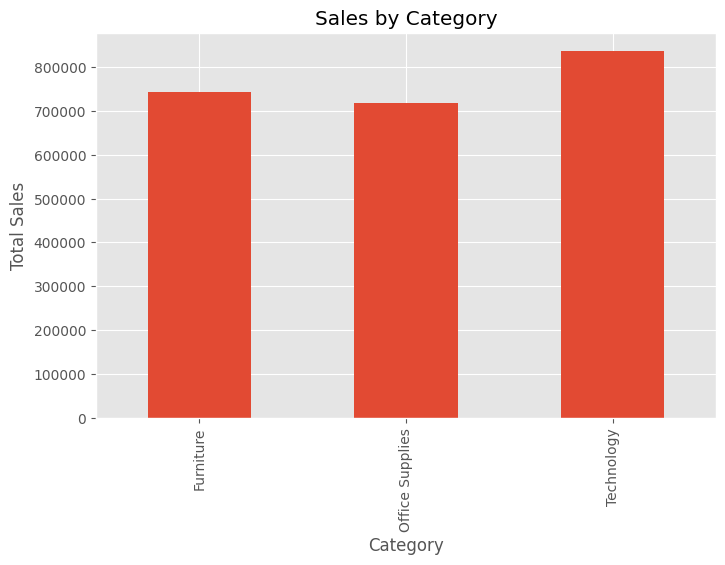

In [21]:
category_sales = df.groupby('Category')['Sales'].sum()

plt.figure(figsize=(8,5))
category_sales.plot(kind='bar')
plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()


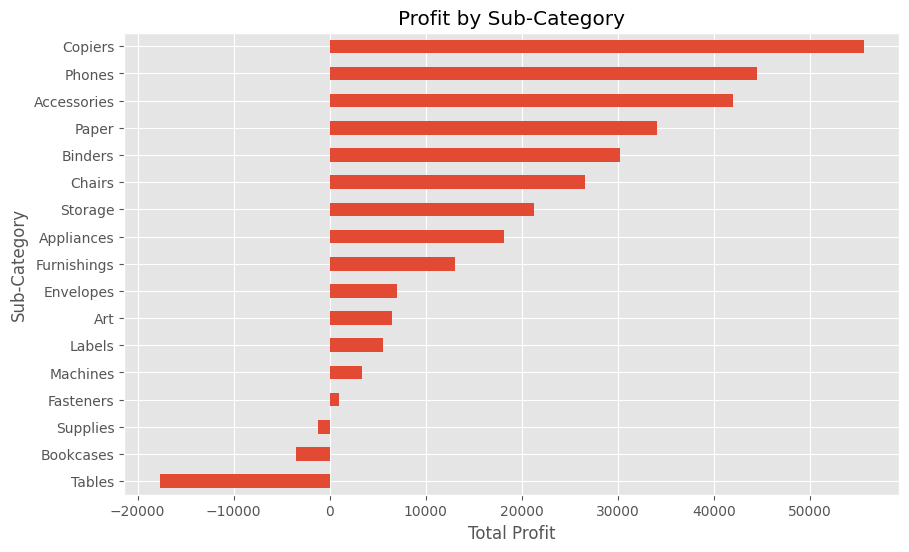

In [22]:
subcategory_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()

plt.figure(figsize=(10,6))
subcategory_profit.plot(kind='barh')
plt.title("Profit by Sub-Category")
plt.xlabel("Total Profit")
plt.ylabel("Sub-Category")
plt.show()


In [23]:
df.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values('Profit')


,Sales,Profit
Sub-Category,,
Tables,206965.5320,-17725.4811
Bookcases,114879.9963,-3472.5560
Supplies,46673.5380,-1189.0995
Fasteners,3024.2800,949.5182
Machines,189238.6310,3384.7569
Labels,12486.3120,5546.2540
Art,27118.7920,6527.7870
Envelopes,16476.4020,6964.1767
Furnishings,91705.1640,13059.1436


# Superstore Sales Analysis 📊

**Objective:**  
Analyze sales performance across regions, categories, and time to identify trends,
best and worst performing products, and provide business recommendations.

**Prepared by:** Pranjal Singh  
**Client / Case Study:** Alfido Tech  


## Key Insights
- Technology category generates the highest profit margins
- Furniture category suffers losses due to heavy discounting
- West and East regions outperform others in sales and profit
- Sales peak during Q4, showing strong seasonality


## Business Recommendations
1. Reduce deep discounting on loss-making sub-categories like Tables
2. Focus marketing efforts on high-margin Technology products
3. Plan inventory and campaigns ahead of Q4 seasonal demand
4. Optimize pricing strategy to improve overall profit margins
5. Improve regional targeting for underperforming regions
